In [1]:
# downloading data set zip file
! kaggle datasets download -d prasadvpatil/mrl-dataset

zsh:1: command not found: kaggle


In [2]:
!unzip -q mrl-dataset.zip

replace train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [4]:
path = "/Users/nipuni/Desktop/CS 570/Final Project/Final_Project"

def is_accessible(path):
    """Check if the path is accessible."""
    return os.path.exists(path) and os.access(path, os.R_OK)

if is_accessible(path):
    print(f"The path '{path}' is accessible.")
else:
    print(f"The path '{path}' is not accessible.")


The path '/Users/nipuni/Desktop/CS 570/HW/Final_Project' is accessible.


In [5]:


if os.path.exists(path):
    # Path exists, proceed with accessing it
    pass
else:
    # Path does not exist, handle the situation
    print("Path does not exist.")


In [6]:
X = []
Y = []

for i in tqdm(glob(path+'/train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((24,24)))
    X.append(temp)
    Y.append(0)

for i in tqdm(glob(path+'/train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((24,24)))
    X.append(temp)
    Y.append(1)

100%|██████████| 2000/2000 [00:00<00:00, 2832.00it/s]


In [7]:
print(X[0].shape, Y[1999],Y[2000], len(X),len(Y))

(24, 24) 0 1 4000 4000


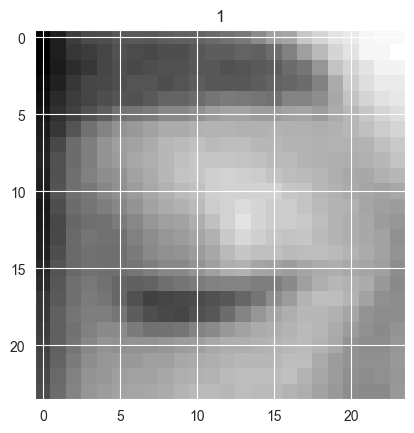

In [8]:
t = 3999


plt.imshow(X[t], cmap='gray')
plt.title(Y[t])
plt.show()

In [9]:
# Normalizing the images using Min-Max Scaling algorithm
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [10]:
X.shape

(4000, 24, 24)

In [11]:
# Expanding the dimensions of array (numpy)
X = np.expand_dims(X,-1)

In [12]:
X.shape

(4000, 24, 24, 1)

In [13]:
# Spliting the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

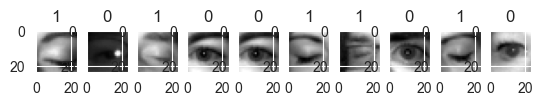

In [14]:
fig =  plt.figure()
for i in range(10):
    fig.add_subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")

## CNN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D,Dropout, Flatten

In [16]:


model = Sequential([
      Input(shape=(24, 24, 1)),

      Conv2D(filters = 32, kernel_size = 3, strides = 1, activation = 'relu'),
      MaxPooling2D(strides = 2),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      MaxPooling2D(strides = 2),
      Conv2D(filters = 128, kernel_size = 3, strides = 1, activation = 'relu'),
      MaxPooling2D(strides = 2),


      Flatten(),
      Dense(units  = 64, activation = 'relu'),
      Dropout(0.5),

      Dense(units = 1, activation = 'sigmoid')
  ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 22, 22, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,993 (394.50 KB)

 Trainable params: 100,993 (394.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compiling the Model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [18]:
# Training of the Model
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(x_train, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          callbacks=[early_stopping_cb]
          )


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6773 - loss: 0.5888 - val_accuracy: 0.9062 - val_loss: 0.2167
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9347 - loss: 0.1763 - val_accuracy: 0.9812 - val_loss: 0.0686
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9727 - loss: 0.0861 - val_accuracy: 0.9828 - val_loss: 0.0537
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9919 - loss: 0.0438 - val_accuracy: 0.9703 - val_loss: 0.0701
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9896 - loss: 0.0380 - val_accuracy: 0.9969 - val_loss: 0.0269
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9935 - loss: 0.0295 - val_accuracy: 0.9922 - val_loss: 0.0273
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9953 - val_loss: 0.0158
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9966 - loss: 0.0139 - val_accuracy: 0.9953 - val_loss:

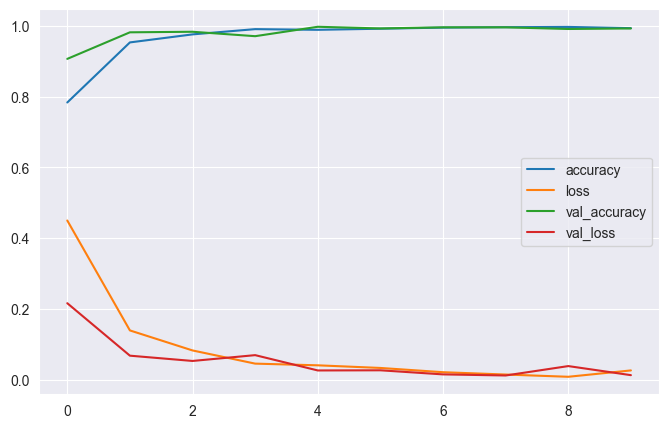

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

In [20]:
# Model Evaluation
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0140


[0.01318687666207552, 0.9950000047683716]

In [21]:
model.save('bestModel.keras')

In [24]:
#Loading the Model Performance
from keras.models import load_model
best_model = load_model('/Users/nipuni/Desktop/CS 570/Final Project/Final_Project/bestModel.keras')
best_model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0140


[0.01318687666207552, 0.9950000047683716]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


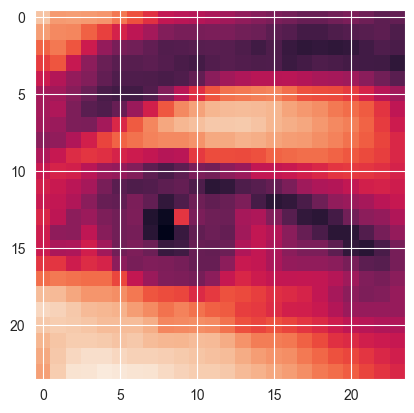

open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


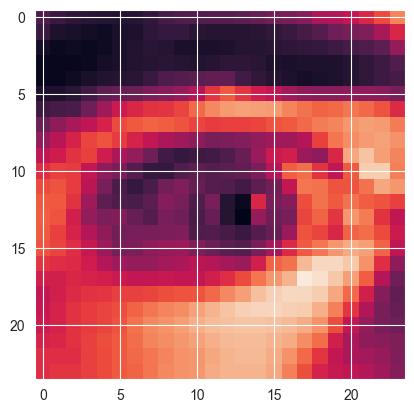

open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


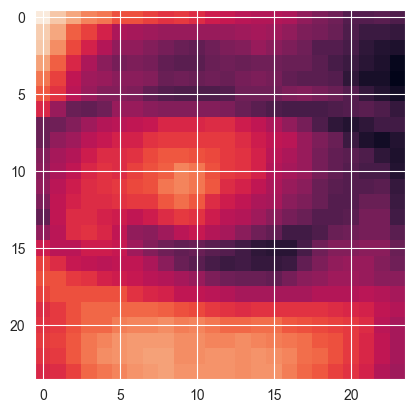

closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


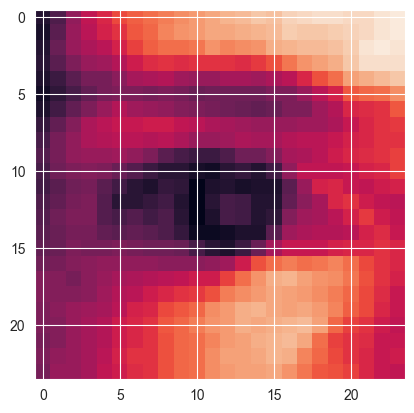

open


In [25]:
# Changing the dimensions and Plotting the trained images
for i in x_test[-5:-1]:
    result = best_model.predict(np.expand_dims(i,0))
    # print(i.shape,np.expand_dims(i,0).shape)
    plt.imshow(i)
    plt.show()

    if result > 0.5:
        print('closed')
    else:
        print("open")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Text(0.5, 25.722222222222214, 'Actual')

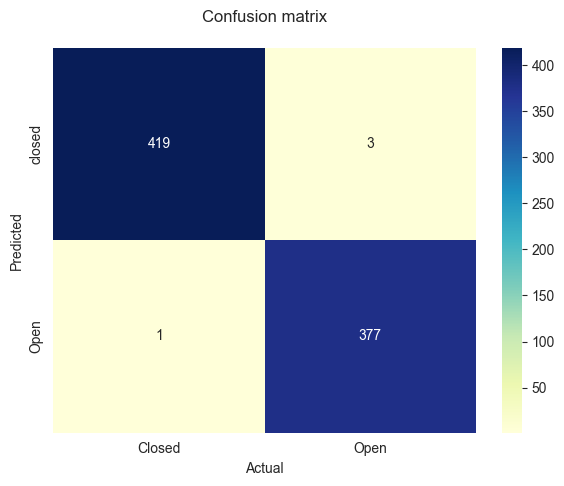

In [26]:
# Prediction and Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [27]:
# Accuracy
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0140
Accuracy: 0.9950000047683716
